### Importing dependacies 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

***Reading dataset***

In [2]:
data = pd.read_csv('../datasets/loan_dataset.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

**Data Preprocessing**

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data.shape

(480, 13)

In [13]:
data.replace({
              'Gender':{'Female':0,'Male':1},
              'Married':{'Yes':1,'No':0},
              'Education':{'Graduate':1,'Not Graduate':0},
              'Self_Employed':{'Yes':1,'No':0},
              'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
              'Loan_Status':{'N':0,'Y':1}
             },inplace=True)

C:\Users\gayat\AppData\Local\Temp\ipykernel_13544\3804333542.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [16]:
data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [18]:
data.replace({'Dependents':{'3+':4}},inplace=True)

In [20]:
data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

**Data Visualization**

<Axes: xlabel='Gender', ylabel='count'>

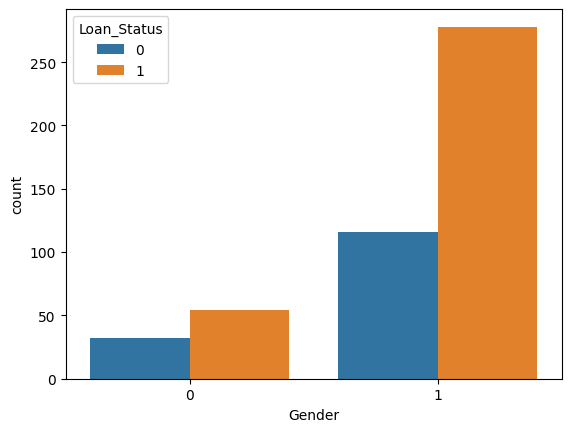

In [24]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

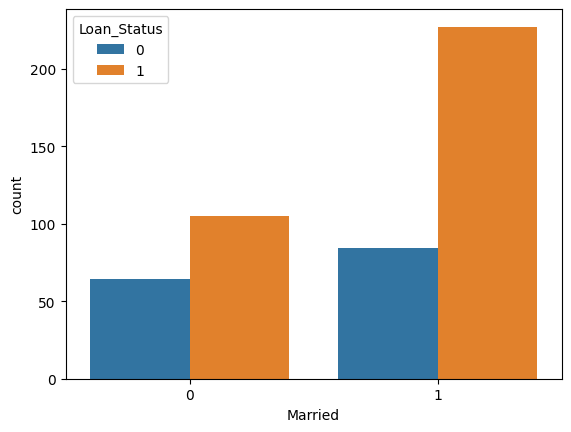

In [25]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<Axes: xlabel='Education', ylabel='count'>

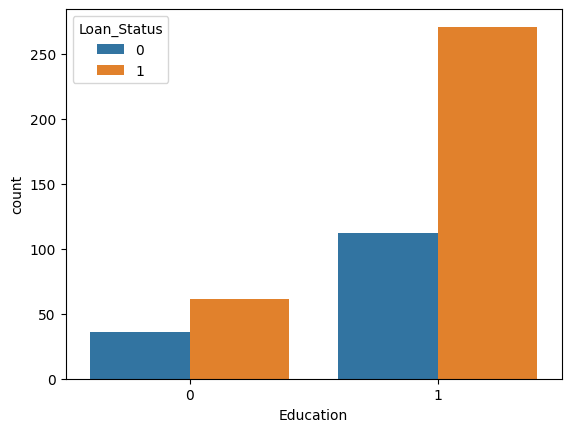

In [26]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Self_Employed', ylabel='count'>

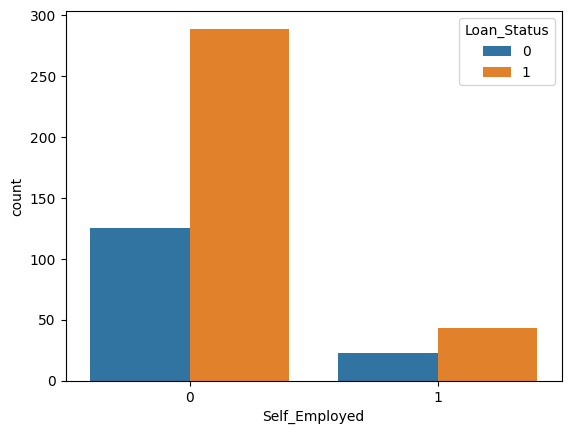

In [27]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

In [32]:
x = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = data['Loan_Status']

In [33]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [34]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


**Spliting Data**

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [37]:
print(x_train.shape,x_test.shape,x.shape)

(384, 11) (96, 11) (480, 11)


In [38]:
print(y_train.shape,y_test.shape,y.shape)

(384,) (96,) (480,)


**Importing Model**

In [39]:
model = svm.SVC(kernel='linear')

In [40]:
model.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [41]:
train_pre = model.predict(x_train)
train_acc = accuracy_score(y_train,train_pre)
print("Accuracy of Training =",train_acc)

Accuracy of Training = 0.8046875


In [42]:
test_pre = model.predict(x_test)
test_acc = accuracy_score(y_test,test_pre)
print("Accuracy of testing =",test_acc)

Accuracy of testing = 0.8333333333333334


**Predictive System**

In [47]:
columns = [
    'Gender','Married','Dependents','Education',
    'Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount',
    'Loan_Amount_Term','Credit_History','Property_Area'
]

input_data = pd.DataFrame(
    [['Male','Yes',1,'Graduate','No',4583,1508,128,360,1,'Rural']],
    columns=columns
)
input_data.replace({
              'Gender':{'Female':0,'Male':1},
              'Married':{'Yes':1,'No':0},
              'Education':{'Graduate':1,'Not Graduate':0},
              'Self_Employed':{'Yes':1,'No':0},
              'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
              'Loan_Status':{'N':0,'Y':1},
              'Dependents':{'3+':4}
             },inplace=True)

in_np = np.asarray(input_data)
in_re = in_np.reshape(1,-1)
predict = model.predict(in_re)

if predict==0:
    print("Loan is not Approved")
else:
    print("Loan Approved")

Loan Approved


C:\Users\gayat\AppData\Local\Temp\ipykernel_13544\3094946914.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_data.replace({
C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
